In [28]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.modeling.models import Voigt1D
from astropy.modeling import fitting
import seaborn as sns

In [2]:
data = fits.getdata('of0e53010_test_new_x1d.fits')
w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) # change if the spectra starts at a different wavelength
hd_wavelength_data, hd_flux_data, hd_error_data = w[mask], f[mask], e[mask]

In [3]:
# Load data from fluxpal
hd191939_table = Table.read('hd-191939.ecsv', format='ascii.ecsv')
hd191939_df = hd191939_table.to_pandas()
hd191939_df

,Ion,Rest Wavelength,Flux,Error,Blended Line
0,C III,1176.372,7.999070e-16,2.750151e-16,True
1,Si III,1206.499,-7.143874e-16,0.000000e+00,False
2,Si III,1303.323,-7.919437e-16,0.000000e+00,True
3,O V,1218.390,-3.329361e-15,0.000000e+00,False
4,O V,1371.292,-2.992557e-16,0.000000e+00,False
5,N V,1242.804,-3.968238e-16,0.000000e+00,True
6,S II,1259.519,-3.444762e-16,0.000000e+00,True
7,Si II,1265.001,-3.199288e-16,0.000000e+00,True
8,Si II,1304.369,-7.420895e-16,0.000000e+00,False
9,Si II,1533.430,-5.950202e-16,0.000000e+00,True


In [6]:
data = fits.getdata('hlsp_muscles_hst_stis_tau_ceti_e140m_v1_component-spec.fits')
w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) # change if the spectra starts at a different wavelength
tc_wavelength_data, tc_flux_data, tc_error_data = w[mask], f[mask], e[mask]

In [7]:
# Load data from fluxpal
tauceti_table = Table.read('tau-ceti.ecsv', format='ascii.ecsv')
tauceti_df = tauceti_table.to_pandas()
tauceti_df

,Ion,Rest Wavelength,Flux,Error,Blended Line
0,C III,1176.372,1.467025e-14,1.179191e-15,True
1,Si III,1206.499,3.085698e-14,8.772685e-16,False
2,Si III,1303.323,-1.681547e-15,0.000000e+00,True
3,O V,1218.390,1.113160e-14,7.765193e-16,False
4,O V,1371.292,-3.626990e-16,0.000000e+00,False
5,N V,1242.804,5.408060e-15,3.780635e-16,True
6,S II,1259.519,-9.326317e-16,0.000000e+00,True
7,Si II,1265.001,1.167004e-14,4.028759e-16,True
8,Si II,1304.369,-1.664752e-15,0.000000e+00,False
9,Si II,1533.430,2.195836e-14,7.400745e-16,True


In [118]:
data = fits.getdata('hlsp_muscles_hst_stis_hd-120411_g140l_v2_component-spec.fits')
w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) # change if the spectra starts at a different wavelength
hd1_wavelength_data, hd1_flux_data, hd1_error_data = w[mask], f[mask], e[mask]

In [121]:
hd1_wavelength_data[1] - hd1_wavelength_data[0]

0.581951082805972

In [122]:
hd_wavelength_data[1] - hd_wavelength_data[0]

0.5836180852390953

In [128]:
peak_width = 3.5
wavelength = 1336
wavelength_mask = (hd1_wavelength_data > wavelength - peak_width) & (hd1_wavelength_data < wavelength + peak_width) 

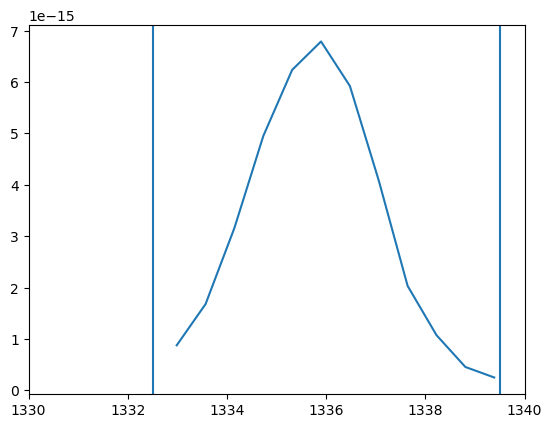

In [130]:
plt.plot(hd1_wavelength_data[wavelength_mask], hd1_flux_data[wavelength_mask])
plt.axvline(x=1336 - 3.5)
plt.axvline(x=1336 + 3.5)
plt.xlim(1330, 1340)
plt.show()

In [115]:
peak_width = 3
wavelength = 1334
wavelength_mask = (hd_wavelength_data > wavelength - peak_width) & (hd_wavelength_data < wavelength + peak_width) 

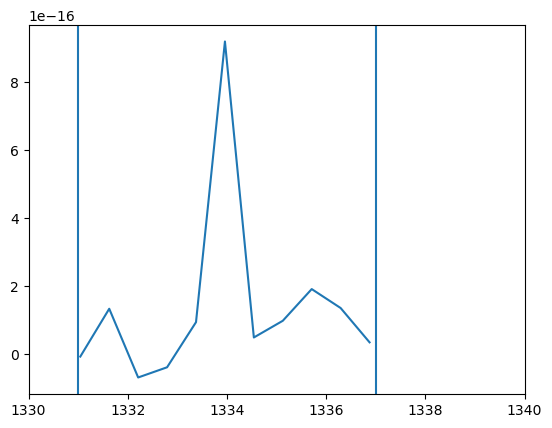

In [117]:
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask])
plt.axvline(x=1334 - 3)
plt.axvline(x=1334 + 3)
plt.xlim(1330, 1340)
plt.show()

[[Model]]
    Model(voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 12
    # variables        = 8
    chi-square         = 3.5911e-32
    reduced chi-square = 8.9778e-33
    Akaike info crit   = -882.669939
    Bayesian info crit = -878.790685
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    amplitude_0:  at initial value
    x_0_0:        at initial value
    fwhm_L_0:     at initial value
    fwhm_G_0:     at initial value
    amplitude_1:  at initial value
    x_0_1:        at initial value
    fwhm_L_1:     at initial value
    fwhm_G_1:     at initial value
[[Variables]]
    amplitude_0:  1.3668e-15 (init = 9.180386e-16)
    x_0_0:        1334.00000 (init = 1334)
    fwhm_L_0:     0.20000000 (init = 0.2)
    fwhm_G_0:     0.20000000 (init = 0.2)
    amplitude_1:  1.2224e-15 (init = 2e-16)
    x_0_1:        1336.00000 (init = 1336)
    fwhm_L_1:     0.20000000 (init = 0.2)


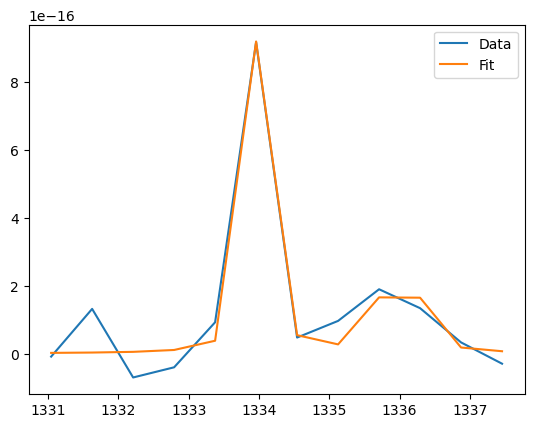

In [113]:
## import numpy as np
from astropy.modeling.models import Voigt1D
from lmfit import Model, Parameters

# Define your data
# Assuming you have defined:
# wavelength: array of wavelengths
# hd_flux_data: array of flux values
# wavelength_mask: mask for the wavelength region of interest

# Define the Voigt profile model
voigt_model = Voigt1D()

# Define a fitting function that returns the model's values
def voigt_fit(x, **params):
    y = np.zeros_like(x)
    num_profiles = len(params) // 4  # Each profile has 4 parameters
    for i in range(num_profiles):
        amplitude = params[f'amplitude_{i}']
        x_0 = params[f'x_0_{i}']
        fwhm_L = params[f'fwhm_L_{i}']
        fwhm_G = params[f'fwhm_G_{i}']
        voigt_model.amplitude_L = amplitude
        voigt_model.x_0 = x_0
        voigt_model.fwhm_L = fwhm_L
        voigt_model.fwhm_G = fwhm_G
        y += voigt_model(x)
    return y

# Create an lmfit model
lmfit_model = Model(voigt_fit)

# Set initial parameter values
num_peaks = 2  # Example: Fit two Voigt profiles
params = Parameters()
init_amp = np.max(hd_flux_data[wavelength_mask]) 
init_x0 = wavelength
init_fwhm_g = 0.2
init_fwhm_l = 0.2
params.add(f'amplitude_{0}', value=init_amp)
params.add(f'x_0_{0}', value=init_x0)
params.add(f'fwhm_L_{0}', value=init_fwhm_l)
params.add(f'fwhm_G_{0}', value=init_fwhm_g)
params.add(f'amplitude_{1}', value=2e-16)
params.add(f'x_0_{1}', value=1336)
params.add(f'fwhm_L_{1}', value=init_fwhm_l)
params.add(f'fwhm_G_{1}', value=init_fwhm_g)
    
# Fit the model to the data
result = lmfit_model.fit(hd_flux_data[wavelength_mask], params=params, x=hd_wavelength_data[wavelength_mask])

# Print fit report
print(result.fit_report())

# Plot the results
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask], label='Data')
plt.plot(hd_wavelength_data[wavelength_mask], result.best_fit, label='Fit')
plt.legend()
plt.show()


In [83]:
init_x0 = wavelength
init_amp = np.max(hd_flux_data[wavelength_mask]) 
init_fwhm_g = peak_width/5
init_fwhm_l = peak_width/5

# Voigt distributions
voigt_profile = Voigt1D(x_0 = init_x0, amplitude_L = init_amp, fwhm_L = init_fwhm_l, fwhm_G = init_fwhm_g)
fitter = fitting.LevMarLSQFitter()
fitted_model = fitter(voigt_profile, hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask])

NonFiniteValueError: Objective function has encountered a non-finite value, this will cause the fit to fail!
Please remove non-finite values from your input data before fitting to avoid this error.

In [80]:
peak_width = 5.0
wavelength = 1334.46
wavelength_mask = (tc_wavelength_data > wavelength - peak_width) & (tc_wavelength_data < wavelength + peak_width) 

In [79]:
spectral_resolution = 11*(tc_wavelength_data[1] - tc_wavelength_data[0])
spectral_resolution

0.20261998281353044

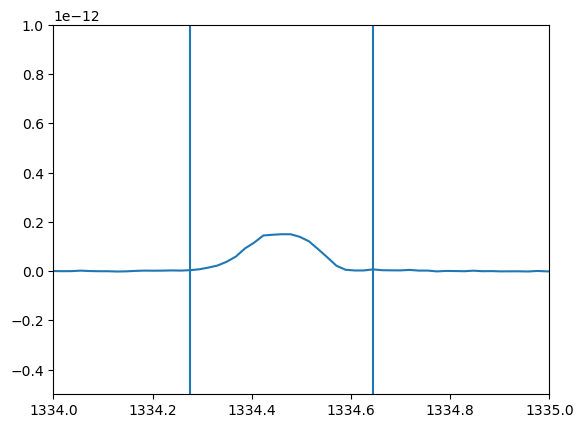

In [78]:
plt.plot(tc_wavelength_data, tc_flux_data)
plt.axvline(x=1334.46 - spectral_resolution)
plt.axvline(x=1334.46 + spectral_resolution)
plt.ylim(-0.5e-12, 1e-12)
plt.xlim(1334, 1335)
plt.show()

In [100]:
# Compare Fe XII
tauceti_cii = tauceti_df.loc[tauceti_df['Rest Wavelength'] == 1335.709, 'Flux'].values
hd191939_cii = hd191939_df.loc[hd191939_df['Rest Wavelength'] == 1335.709, 'Flux'].values
print(f"Ratio T-H: {tauceti_cii/hd191939_cii}")

Ratio T-H: [73.17868505]


In [101]:
# Compare Fe XII
tauceti_cii = tauceti_df.loc[tauceti_df['Rest Wavelength'] == 1354.080, 'Flux'].values
hd191939_cii = hd191939_df.loc[hd191939_df['Rest Wavelength'] == 1354.080, 'Flux'].values
print(f"Ratio T-H: {tauceti_cii/hd191939_cii}")

Ratio T-H: [0.47657132]
